In [1]:
import numpy as np
import pandas as pd
from datetime import datetime

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import datetime as dt
import time

In [2]:
# portfolio of stocks
stocks = ['LULU', 'ADBE', 'PYPL', 'NKE', 'MC']

#### Download historical data from TradingView API

In [3]:
# from tvDatafeed import TvDatafeed, Interval
# tv = TvDatafeed()

# num_stocks = len(stocks)


# # days calculation
# start_date = datetime(2010, 1, 1)
# today = datetime.now()
# days_difference = (today - start_date).days

# n_bars = min(days_difference + 100, 5000)  # max 5000 bars API limit

In [4]:
# # Exchange mapping
# stock_exchanges = {
#     'LULU': 'NASDAQ',
#     'ADBE': 'NASDAQ',
#     'PYPL': 'NASDAQ',
#     'NKE': 'NYSE',
#     'MC': 'EURONEXT'
# }

# # Download function with retry and error handling
# def download_with_retry(symbol, exchange, retries=3, delay=2):
#     for attempt in range(retries):
#         try:
#             print(f"Downloading {symbol} from {exchange} (attempt {attempt+1})")
#             data = tv.get_hist(
#                 symbol=symbol, 
#                 exchange=exchange, 
#                 interval=Interval.in_daily,
#                 n_bars=1000  # circa 4 anni di dati
#             )
#             if data is not None and not data.empty:
#                 print(f"✅ {symbol}: {len(data)} rows downloaded")
#                 return data
#         except Exception as e:
#             print(f"❌ Error downloading {symbol}: {e}")
        
#         if attempt < retries - 1:
#             time.sleep(delay)
    
#     print(f"❌ Failed to download {symbol} after {retries} attempts")
#     return None

In [5]:
# # Download to DataFrame
# print("🚀 Starting data download...")
# data_dict = {}
# failed_downloads = []

# for stock, exchange in stock_exchanges.items():
#     data = download_with_retry(stock, exchange)
#     if data is not None:
#         # keep only the Close and Volume columns and rename them
#         data_dict[stock] = data[['close', 'volume']].rename(
#             columns={'close': f'{stock}_close', 'volume': f'{stock}_volume'}
#         )
#     else:
#         failed_downloads.append(stock)

# if failed_downloads:
#     print(f"⚠️ Failed to download: {failed_downloads}")

# # Combine into a single DataFrame
# if data_dict:
#     df = pd.concat(data_dict.values(), axis=1)
#     print(f"📊 Combined DataFrame shape: {df.shape}")
#     print(f"📅 Date range: {df.index.min()} to {df.index.max()}")
#     print("\nFirst 5 rows:")
#     print(df.head())
# else:
#     print("❌ No data downloaded successfully")

In [6]:
# # count nan
# nan_counts = df.isna().sum()
# print("NaN counts per column:")
# print(nan_counts[nan_counts > 0])

# """
# NaN counts per column:
# LULU_close     1000
# LULU_volume    1000
# ADBE_close     1000
# ADBE_volume    1000
# PYPL_close     1000
# PYPL_volume    1000
# NKE_close      1000
# NKE_volume     1000
# MC_close       1000
# MC_volume      1000
# dtype: int64
# """

Unfortunately, the dataset contains a significant amount of missing data, particularly for the 'close' and 'volume' columns of each stock. We need to find a different API for the data extraction process of the selected stocks.

#### Download historical data from yf API

In [7]:
# import yfinance as yf

# start_date = "2020-01-01"
# end_date = datetime.now().strftime("%Y-%m-%d")

# # Download historical data from yf API
# data = yf.download(stocks, start=start_date, end=end_date, group_by='ticker')

# # download data to csv
# data.to_csv("stock_data.csv")

#### Download analysis from csv downloaded data

In [8]:
# Load the CSV with MultiIndex columns (Tickers, OHLCV)
df = pd.read_csv("stock_data.csv", header=[0,1], index_col=0)

# Drop any rows that are completely NaN (e.g. 'Date' row)
df = df.dropna(how='all')

# Convert all values to float
df = df.astype(float)

# Show the result
df.head()

Ticker            LULU                                                 \
Price             Open        High         Low       Close     Volume   
Date                                                                    
2020-01-02  232.899994  233.470001  231.770004  233.419998  1449300.0   
2020-01-03  231.240005  234.500000  230.229996  232.639999  1315400.0   
2020-01-06  231.490005  235.529999  230.800003  235.429993  1460700.0   
2020-01-07  235.500000  236.850006  233.339996  233.699997  1367900.0   
2020-01-08  234.880005  238.009995  234.009995  237.270004  1883900.0   

Ticker            PYPL                                                 ...  \
Price             Open        High         Low       Close     Volume  ...   
Date                                                                   ...   
2020-01-02  109.470001  111.209999  109.275002  110.750000  7418800.0  ...   
2020-01-03  109.489998  110.419998  108.760002  108.760002  7098300.0  ...   
2020-01-06  107.570000  110.220001  107.440002  110.169998  6764500.0  ...   
2020-01-07  111.500000  111.559998  109.529999  109.669998  6898700.0  ...   
2020-01-08  110.400002  112.639999  109.820000  111.820000  8293600.0  ...   

Ticker            NKE                                                     MC  \
Price            Open       High        Low      Close     Volume       Open   
Date                                                                           
2020-01-02  94.584357  95.377536  94.267082  95.368202  5644100.0  21.568006   
2020-01-03  93.865816  95.181565  93.604534  95.106911  4541800.0  21.527674   
2020-01-06  94.201770  95.032276  94.127123  95.022949  4612400.0  20.895891   
2020-01-07  95.004274  95.872106  94.071121  94.976280  6719900.0  21.010149   
2020-01-08  94.537704  95.312222  94.108454  94.761665  4942200.0  21.480623   

Ticker                                                 
Price            High        Low      Close    Volume  
Date                                                   
2020-01-02  21.803243  21.406700  21.789801  506500.0  
2020-01-03  21.662097  20.956382  21.231947  506300.0  
2020-01-06  21.386531  20.795075  21.211782  495100.0  
2020-01-07  21.668818  20.976543  21.480625  664000.0  
2020-01-08  21.736026  21.201698  21.635208  707900.0  

[5 rows x 25 columns]

In [9]:
# # Here you can plot the charts for every ticker

# # For every ticker, plot Close
# import matplotlib.pyplot as plt

# for ticker in df.columns.levels[0]:
#     plt.figure(figsize=(12, 6))
#     plt.plot(df[ticker]['Close'], label=ticker)
#     plt.title(f"{ticker} Close Price")
#     plt.xlabel("Date")
#     plt.ylabel("Close Price")
#     plt.legend()
#     plt.show()

LULU Volume Analysis

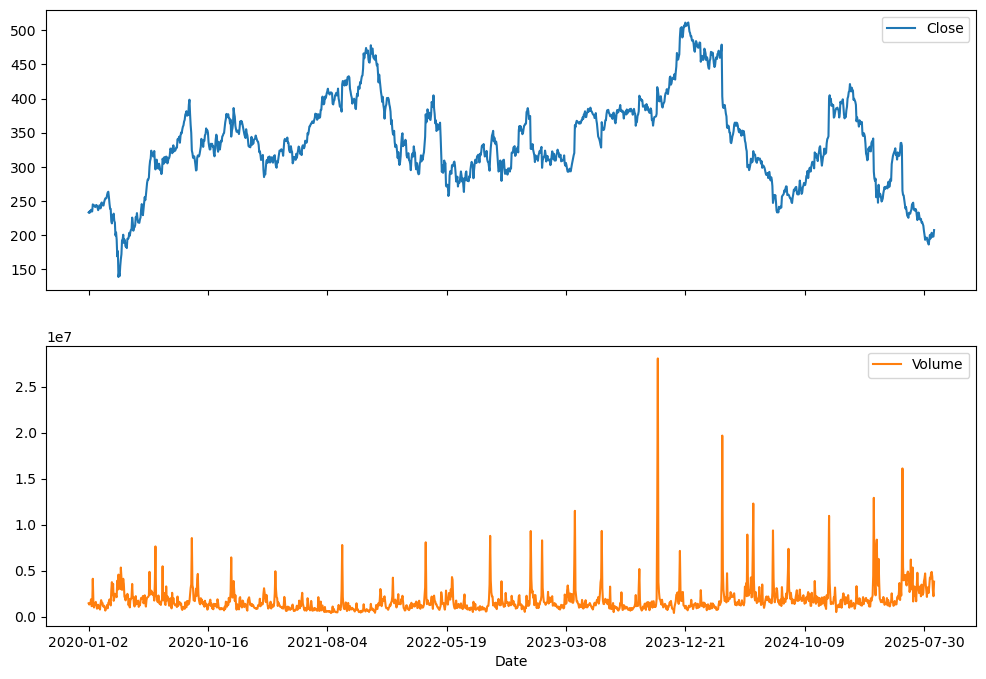

In [10]:
# Simple plot for ticker LULU with Close and Volume
df['LULU'][['Close', 'Volume']].plot(subplots=True, figsize=(12, 8));

In [11]:
# df LULU, df level 0 = 'LULU'
lulu = df['LULU']

# drop Open, High, Low
lulu = lulu.drop(['Open', 'High', 'Low'], axis=1)

lulu.head()

Price,Close,Volume
Date,,
2020-01-02,233.419998,1449300.0
2020-01-03,232.639999,1315400.0
2020-01-06,235.429993,1460700.0
2020-01-07,233.699997,1367900.0
2020-01-08,237.270004,1883900.0


In [20]:
import plotly.express as px
import plotly.graph_objects as go

px.histogram(lulu, x='Volume', y='Close', nbins=150, orientation='h').show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed